In [9]:
from pathlib import Path

import matplotlib.pyplot as plt

import potentials

from io import StringIO

import numpy as np

In [2]:
root = Path('C:/Users/lmh1/Documents/library/potential_LAMMPS/1985--Foiles-S-M--Ni-Cu--LAMMPS--ipr1')
eam_cu = potentials.paramfile.load_eam(Path(root, 'Cu_smf7.eam'))
eam_ni = potentials.paramfile.load_eam(Path(root, 'Ni_smf7.eam'))

In [3]:
eam_ni.header 

'Ni functions for NiCu alloy (exponential Z)'

In [4]:
alloy = potentials.paramfile.eam_to_eam_alloy([Path(root, 'Cu_smf7.eam'), Path(root, 'Ni_smf7.eam')], ['Cu', 'Ni'])

In [7]:
f = StringIO(eam_ni.build())
eam_ni2 = potentials.paramfile.load_eam(f)

In [10]:
np.allclose(eam_ni.r, eam_ni2.r)

True

In [11]:
np.allclose(eam_ni.rho, eam_ni2.rho)

True

In [12]:
np.allclose(eam_ni.F_rho(), eam_ni2.F_rho())

True

In [13]:
np.allclose(eam_ni.rho_r(), eam_ni2.rho_r())

True

In [15]:
np.allclose(eam_ni.rphi_r(), eam_ni2.rphi_r())

True

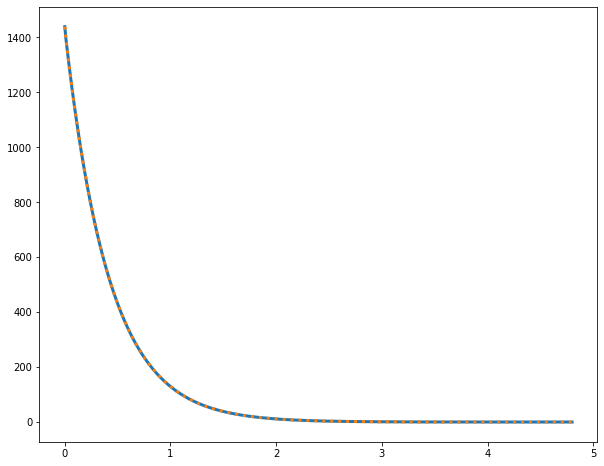

In [8]:
fig = plt.figure(figsize=(10,8))
plt.plot(eam_ni.r, eam_ni.rphi_r(), lw=3)
plt.plot(eam_ni2.r, eam_ni2.rphi_r(), ':', lw=3)

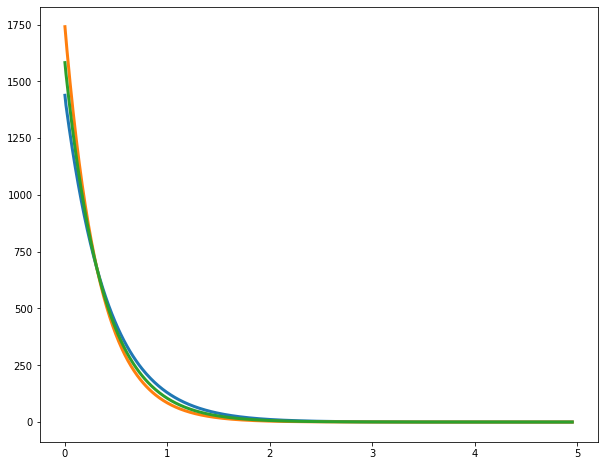

In [51]:
fig = plt.figure(figsize=(10,8))
#plt.plot(eam_ni.r, eam_ni.rphi_r(), lw=3)
plt.plot(alloy.r, alloy.rphi_r('Ni'), lw=3)
plt.plot(alloy.r, alloy.rphi_r('Cu'), lw=3)
plt.plot(alloy.r, alloy.rphi_r(['Cu', 'Ni']), lw=3)

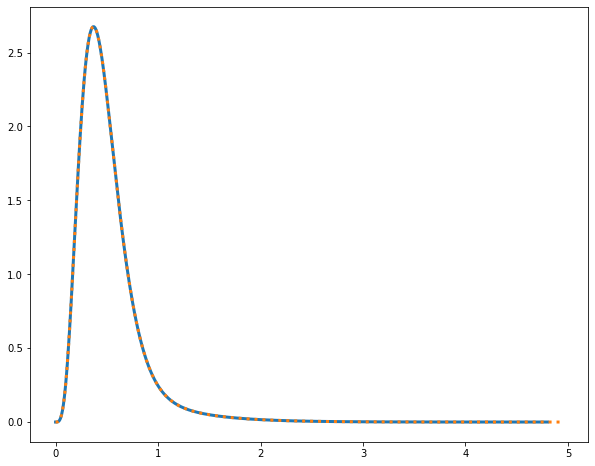

In [52]:
fig = plt.figure(figsize=(10,8))
plt.plot(eam_ni.r, eam_ni.rho_r(), lw=3)
plt.plot(alloy.r, alloy.rho_r('Ni'), ':', lw=3)

In [36]:
eam_ni.rho_r(alloy.r)

array([0.00000000e+00, 5.73202064e-05, 9.76216927e-04, 4.46891129e-03,
       1.27000359e-02, 2.78499499e-02, 5.18587847e-02, 8.62672500e-02,
       1.32140903e-01, 1.90049368e-01, 2.60084701e-01, 3.41904818e-01,
       4.34791974e-01, 5.37718681e-01, 6.49415628e-01, 7.68437741e-01,
       8.93225807e-01, 1.02216205e+00, 1.15361876e+00, 1.28599964e+00,
       1.41777388e+00, 1.54750331e+00, 1.67386309e+00, 1.79565655e+00,
       1.91182487e+00, 2.02145217e+00, 2.12376690e+00, 2.21813987e+00,
       2.30407983e+00, 2.38122690e+00, 2.44934447e+00, 2.50830995e+00,
       2.55810479e+00, 2.59880406e+00, 2.63056587e+00, 2.65362085e+00,
       2.66826186e+00, 2.67483417e+00, 2.67372604e+00, 2.66535997e+00,
       2.65018453e+00, 2.62866691e+00, 2.60128618e+00, 2.56852714e+00,
       2.53087499e+00, 2.48881056e+00, 2.44280625e+00, 2.39332248e+00,
       2.34080479e+00, 2.28568143e+00, 2.22836142e+00, 2.16923302e+00,
       2.10866272e+00, 2.04699439e+00, 1.98454894e+00, 1.92162410e+00,
      

In [42]:
alloy.rphi_r(['Ni', 'Cu'])

array([1.58276800e+03, 1.53486925e+03, 1.49417906e+03, 1.45447630e+03,
       1.41586619e+03, 1.37826659e+03, 1.34166901e+03, 1.30604108e+03,
       1.27135882e+03, 1.23759665e+03, 1.20473031e+03, 1.17273600e+03,
       1.14159062e+03, 1.11127163e+03, 1.08175713e+03, 1.05302578e+03,
       1.02505681e+03, 9.97830006e+02, 9.71325674e+02, 9.45524659e+02,
       9.20408306e+02, 8.95958457e+02, 8.72157435e+02, 8.48988031e+02,
       8.26433493e+02, 8.04477512e+02, 7.83104214e+02, 7.62298143e+02,
       7.42044255e+02, 7.22327903e+02, 7.03134830e+02, 6.84451156e+02,
       6.66263369e+02, 6.48558317e+02, 6.31323195e+02, 6.14545537e+02,
       5.98213210e+02, 5.82314400e+02, 5.66837608e+02, 5.51771640e+02,
       5.37105597e+02, 5.22828871e+02, 5.08931134e+02, 4.95402334e+02,
       4.82232682e+02, 4.69412652e+02, 4.56932968e+02, 4.44784603e+02,
       4.32958765e+02, 4.21446900e+02, 4.10240677e+02, 3.99331987e+02,
       3.88712939e+02, 3.78375846e+02, 3.68313229e+02, 3.58517805e+02,
      

In [30]:
alloy.set_rho_r('Ni', table=eam_ni.rho_r(r=alloy.r))

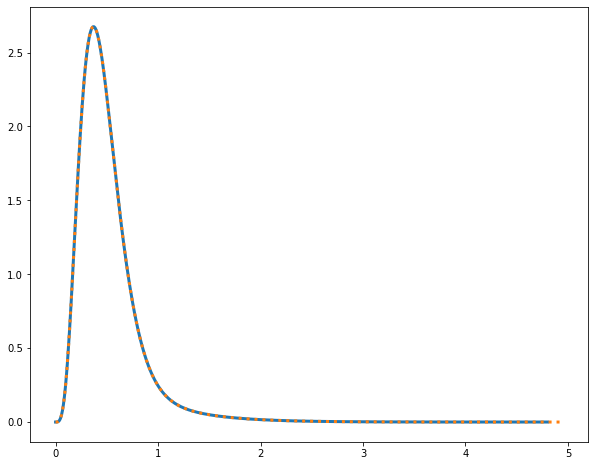

In [20]:
fig = plt.figure(figsize=(10,8))
plt.plot(eam_ni.r, eam_ni.rho_r(), lw=3)
plt.plot(alloy.r, alloy.rho_r('Ni'), ':', lw=3)

In [4]:
eam_ni.print_overview()

at#  mass      alat       lat
 28   58.71          3.52 FCC

rho: [0.         0.0004008  0.0008016  0.0012024  0.00160321 0.00200401
 0.00240481 0.00280561 0.00320641 0.00360721 0.00400802 0.00440882
 0.00480962 0.00521042 0.00561122 0.00601202 0.00641283 0.00681363
 0.00721443 0.00761523 0.00801603 0.00841683 0.00881764 0.00921844
 0.00961924 0.01002004 0.01042084 0.01082164 0.01122244 0.01162325
 0.01202405 0.01242485 0.01282565 0.01322645 0.01362725 0.01402806
 0.01442886 0.01482966 0.01523046 0.01563126 0.01603206 0.01643287
 0.01683367 0.01723447 0.01763527 0.01803607 0.01843687 0.01883768
 0.01923848 0.01963928 0.02004008 0.02044088 0.02084168 0.02124248
 0.02164329 0.02204409 0.02244489 0.02284569 0.02324649 0.02364729
 0.0240481  0.0244489  0.0248497  0.0252505  0.0256513  0.0260521
 0.02645291 0.02685371 0.02725451 0.02765531 0.02805611 0.02845691
 0.02885772 0.02925852 0.02965932 0.03006012 0.03046092 0.03086172
 0.03126253 0.03166333 0.03206413 0.03246493 0.03286573 0.033266

 4.79038076 4.8       ]

F(rho): [  0.          -0.37126555  -0.60479555  -0.79881658  -0.97033415
  -1.12679045  -1.27224649  -1.40921107  -1.53936437  -1.66389782
  -1.78369301  -1.89942425  -2.01162111  -2.12070863  -2.22703413
  -2.33088584  -2.43250604  -2.53132821  -2.6276618   -2.72232261
  -2.81544166  -2.90713425  -2.99750254  -3.08663751  -3.17462063
  -3.26152518  -3.34741738  -3.43235727  -3.51639953  -3.5995941
  -3.68198673  -3.76361948  -3.84453112  -3.92475744  -4.00433162
  -4.08328443  -4.16164453  -4.23943859  -4.31669156  -4.39342675
  -4.46966603  -4.5454299   -4.62073767  -4.69560749  -4.77005648
  -4.84410082  -4.91775577  -4.99103581  -5.06395464  -5.13652525
  -5.20876     -5.28067061  -5.35226824  -5.42356354  -5.49456663
  -5.56528719  -5.63573445  -5.70591724  -5.775844    -5.84552281
  -5.9149614   -5.98416719  -6.0531473   -6.12190856  -6.19045752
  -6.25880049  -6.32694352  -6.39489245  -6.4626529   -6.53023026
  -6.59762975  -6.66485639  -6.73191503  -6.

 1.13246956e-03 7.50632250e-04 3.73159021e-04 6.66133815e-16]

rho(r): [0.00000000e+00 5.08646461e-05 8.67020224e-04 3.98929552e-03
 1.13755284e-02 2.50286276e-02 4.67586663e-02 7.80383800e-02
 1.19927738e-01 1.73048417e-01 2.37593202e-01 3.13358740e-01
 3.99792806e-01 4.96049443e-01 6.01047085e-01 7.13526143e-01
 8.32103630e-01 9.55323228e-01 1.08169985e+00 1.20975823e+00
 1.33806541e+00 1.46525732e+00 1.59005972e+00 1.71130395e+00
 1.82793805e+00 1.93903376e+00 2.04378988e+00 2.14153264e+00
 2.23171356e+00 2.31390518e+00 2.38779519e+00 2.45317935e+00
 2.50995347e+00 2.55810479e+00 2.59770305e+00 2.62889142e+00
 2.65187744e+00 2.66692426e+00 2.67434209e+00 2.67448016e+00
 2.66771909e+00 2.65446383e+00 2.63513713e+00 2.61017362e+00
 2.58001440e+00 2.54510232e+00 2.50587767e+00 2.46277454e+00
 2.41621757e+00 2.36661932e+00 2.31437793e+00 2.25987531e+00
 2.20347570e+00 2.14552449e+00 2.08634750e+00 2.02625037e+00
 1.96551835e+00 1.90441622e+00 1.84318842e+00 1.78205938e+00
 1.72123391e+0

In [6]:
alloy.symbols

['Cu', 'Ni']

In [7]:
alloy.print_overview()

sym at#  mass      alat       lat
Cu  29   63.55         3.615 FCC
Ni  28   58.71          3.52 FCC

rho: [0.         0.0004008  0.0008016  0.0012024  0.00160321 0.00200401
 0.00240481 0.00280561 0.00320641 0.00360721 0.00400802 0.00440882
 0.00480962 0.00521042 0.00561122 0.00601202 0.00641283 0.00681363
 0.00721443 0.00761523 0.00801603 0.00841683 0.00881764 0.00921844
 0.00961924 0.01002004 0.01042084 0.01082164 0.01122244 0.01162325
 0.01202405 0.01242485 0.01282565 0.01322645 0.01362725 0.01402806
 0.01442886 0.01482966 0.01523046 0.01563126 0.01603206 0.01643287
 0.01683367 0.01723447 0.01763527 0.01803607 0.01843687 0.01883768
 0.01923848 0.01963928 0.02004008 0.02044088 0.02084168 0.02124248
 0.02164329 0.02204409 0.02244489 0.02284569 0.02324649 0.02364729
 0.0240481  0.0244489  0.0248497  0.0252505  0.0256513  0.0260521
 0.02645291 0.02685371 0.02725451 0.02765531 0.02805611 0.02845691
 0.02885772 0.02925852 0.02965932 0.03006012 0.03046092 0.03086172
 0.03126253 0.03166333 0

 4.94008016 4.95      ]

F(rho):
Cu [  0.          -0.33986781  -0.55912871  -0.74102144  -0.90113352
  -1.04634932  -1.18046686  -1.30585828  -1.42412918  -1.53642977
  -1.64181901  -1.74226009  -1.83880959  -1.93188644  -2.02183693
  -2.10895163  -2.19347745  -2.27562657  -2.35558308  -2.43350809
  -2.5095437   -2.58381608  -2.65643798  -2.7275107   -2.79712573
  -2.86536609  -2.93230746  -2.99801905  -3.06256443  -3.12600218
  -3.18838644  -3.24976741  -3.31019174  -3.36970292  -3.42834159
  -3.48614578  -3.54315121  -3.59939143  -3.65489808  -3.70928232
  -3.76187611  -3.8138142   -3.86512138  -3.91582119  -3.96593601
  -4.0154872   -4.06449506  -4.11297903  -4.16095766  -4.20844869
  -4.25546911  -4.30203523  -4.34816266  -4.39386641  -4.4391609
  -4.48406     -4.52857706  -4.57272493  -4.616516    -4.65996221
  -4.70307512  -4.74586585  -4.78834516  -4.83052346  -4.87241083
  -4.91401699  -4.9553514   -4.99642318  -5.03724121  -5.07781407
  -5.11815011  -5.15825741  -5.19814385  

 -32.75808052 -32.82237388 -32.88668951 -32.95102744 -33.01538766]

rho(r):
Cu [0.00000000e+00 5.74405121e-05 9.40249417e-04 4.32076435e-03
 1.23259120e-02 2.71381583e-02 5.07374900e-02 8.47435910e-02
 1.30332345e-01 1.88206233e-01 2.58602639e-01 3.41327649e-01
 4.35805873e-01 5.41139106e-01 6.56168556e-01 7.79536797e-01
 9.09746788e-01 1.04521620e+00 1.18432599e+00 1.32546260e+00
 1.46705381e+00 1.60759805e+00 1.74568788e+00 1.88002772e+00
 2.00944661e+00 2.13290647e+00 2.24950641e+00 2.35848374e+00
 2.45921214e+00 2.55119756e+00 2.63407229e+00 2.70758759e+00
 2.77160530e+00 2.82608875e+00 2.87109324e+00 2.90675626e+00
 2.93328783e+00 2.95096093e+00 2.96010230e+00 2.96108354e+00
 2.95431289e+00 2.94022735e+00 2.91928553e+00 2.89196104e+00
 2.85873652e+00 2.82009829e+00 2.77653152e+00 2.72851612e+00
 2.67652305e+00 2.62101121e+00 2.56242484e+00 2.50119134e+00
 2.43771953e+00 2.37239827e+00 2.30559549e+00 2.23765743e+00
 2.16890828e+00 2.09964999e+00 2.03016230e+00 1.96070299e+00
 1.891

 -3.09897627e-06 -3.31044205e-06 -3.51642617e-06 -3.71719535e-06]

r*phi(r):
Cu Cu [1.74104480e+03 1.68764272e+03 1.63770867e+03 1.58925165e+03
 1.54222798e+03 1.49659528e+03 1.45231240e+03 1.40933942e+03
 1.36763760e+03 1.32716935e+03 1.28789817e+03 1.24978867e+03
 1.21280648e+03 1.17691828e+03 1.14209169e+03 1.10829532e+03
 1.07549870e+03 1.04367226e+03 1.01278731e+03 9.82815999e+02
 9.53731307e+02 9.25507009e+02 8.98117658e+02 8.71538558e+02
 8.45745745e+02 8.20715963e+02 7.96426643e+02 7.72855884e+02
 7.49982433e+02 7.27785665e+02 7.06245567e+02 6.85342714e+02
 6.65058258e+02 6.45373910e+02 6.26271918e+02 6.07735058e+02
 5.89746613e+02 5.72290364e+02 5.55350568e+02 5.38911950e+02
 5.22959685e+02 5.07479387e+02 4.92457097e+02 4.77879266e+02
 4.63732749e+02 4.50004787e+02 4.36683000e+02 4.23755373e+02
 4.11210247e+02 3.99036308e+02 3.87222577e+02 3.75758398e+02
 3.64633431e+02 3.53837643e+02 3.43361296e+02 3.33194942e+02
 3.23329410e+02 3.13755801e+02 3.04465482e+02 2.95450070e+02
 2

 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Ni Ni [1.43888000e+03 1.39592449e+03 1.36322947e+03 1.33112991e+03
 1.29985803e+03 1.26929349e+03 1.23945494e+03 1.21031403e+03
 1.18185786e+03 1.15406934e+03 1.12693313e+03 1.10043383e+03
 1.07455654e+03 1.04928665e+03 1.02460994e+03 1.00051248e+03
 9.76980701e+02 9.54001325e+02 9.31561401e+02 9.09648277e+02
 8.88249598e+02 8.67353298e+02 8.46947596e+02 8.27020984e+02
 8.07562227e+02 7.88560350e+02 7.70004639e+02 7.51884628e+02
 7.34190098e+02 7.16911069e+02 7.00037794e+02 6.83560758e+02
 6.67470664e+02 6.51758437e+02 6.36415214e+02 6.21432338e+02
 6.06801356e+02 5.92514013e+02 5.78562249e+02 5.64938191e+02
 5.51634152e+02 5.38642623e+02 5.25956274e+02 5.13567944e+02
 5.01470643e+02 4.89657542e+02 4.78121973e+02 4.66857426e+02
 4.55857541e+02 4.45116109e+02 4.34627066e+02 4.24384490e+02
 4.14382598e+02 4.04615743e+02 3.95078409e+02 3.85765210e+02
 3.76670888e+02 3.67790306e+02 3.59118449e+02 3.50650419e+02
 3.42381431e+02 3

In [12]:
fname = Path('C:/Users/lmh1/Documents/library/potential_LAMMPS/2003--Hoyt-J-J--Cu-Pb--LAMMPS--ipr1/pbcu.setfl')

alloy = potentials.paramfile.load_eam(fname)
print(alloy)
fs = potentials.paramfile.EAMFS()
print(fs)

In [13]:
for symbol in alloy.symbols:
    fs.set_symbol_info(**alloy.symbol_info(symbol))

In [2]:
potdb = potentials.Database(remote=False)

In [15]:
for symbol in alloy.symbols:
    print(fs.symbol_info(symbol))
    print(alloy.symbol_info(symbol))

{'symbol': 'Pb', 'number': 82, 'mass': 207.19, 'alat': 4.9095, 'lattice': 'FCC'}
{'symbol': 'Pb', 'number': 82, 'mass': 207.19, 'alat': 4.9095, 'lattice': 'FCC'}
{'symbol': 'Cu', 'number': 29, 'mass': 63.55, 'alat': 3.615, 'lattice': 'FCC'}
{'symbol': 'Cu', 'number': 29, 'mass': 63.55, 'alat': 3.615, 'lattice': 'FCC'}


In [21]:
fs.set_rho(num=alloy.numrho, cutoff=alloy.cutoffrho, delta=alloy.deltarho)

In [3]:
lmppots, df = potdb.get_lammps_potentials(pot_dir_style='local', return_df=True, verbose=True, pair_style=['eam', 'eam/alloy', 'eam/fs'])

Found 186 matching potential_LAMMPS records in local library
Found 0 matching potential_LAMMPS_KIM records in local library
Built 0 lammps potentials for KIM models


In [22]:
alloy.rho

array([  0.        ,   0.2004008 ,   0.4008016 ,   0.6012024 ,
         0.80160321,   1.00200401,   1.20240481,   1.40280561,
         1.60320641,   1.80360721,   2.00400802,   2.20440882,
         2.40480962,   2.60521042,   2.80561122,   3.00601202,
         3.20641283,   3.40681363,   3.60721443,   3.80761523,
         4.00801603,   4.20841683,   4.40881764,   4.60921844,
         4.80961924,   5.01002004,   5.21042084,   5.41082164,
         5.61122244,   5.81162325,   6.01202405,   6.21242485,
         6.41282565,   6.61322645,   6.81362725,   7.01402806,
         7.21442886,   7.41482966,   7.61523046,   7.81563126,
         8.01603206,   8.21643287,   8.41683367,   8.61723447,
         8.81763527,   9.01803607,   9.21843687,   9.41883768,
         9.61923848,   9.81963928,  10.02004008,  10.22044088,
        10.42084168,  10.62124248,  10.82164329,  11.02204409,
        11.22244489,  11.42284569,  11.62324649,  11.82364729,
        12.0240481 ,  12.2244489 ,  12.4248497 ,  12.62

In [26]:
fs.set_F_rho(table=alloy.F_rho('Cu'))

TypeError: set_F_rho() missing 1 required positional argument: 'symbol'

In [28]:
b = [1,2,3,4]
c = [5,6,7,8]

for i, (p, q) in enumerate(zip(b, c)):
    print(i, p, q)

0 1 5
1 2 6
2 3 7
3 4 8


In [29]:
alloy.symbols

['Pb', 'Cu']

In [41]:
symbols = ['Pb', 'Cu', 'Al']

In [42]:
for i, symbol in enumerate(symbols):
    
    for symbol2 in symbols[:i+1]:
        symbolpair = [symbol, symbol2]
        print(symbolpair)

['Pb', 'Pb']
['Cu', 'Pb']
['Cu', 'Cu']
['Al', 'Pb']
['Al', 'Cu']
['Al', 'Al']


In [46]:
num = 3
for i in range(num):
    for j in range(i):
        print(i,j)

1 0
2 0
2 1


In [54]:
f'{5.2:6.3e}'

'5.200e+00'

In [55]:
fx = '6.3e'
f'{5.2:fx}'

ValueError: Invalid format specifier

In [78]:
terms = (500, 0.124, 500, 0.123, 21.4)
xf = '%25.16e'
print(f'%i {xf} %i {xf} {xf}\n' % terms)

500    1.2400000000000000e-01 500    1.2300000000000000e-01    2.1399999999999999e+01



In [74]:
f'%i {xf}' % (5, 6)

'5    6.0000000000000000e+00'

In [75]:
terms = (5, 6)

In [76]:
f'%i {xf}' % terms

'5    6.0000000000000000e+00'